<a href="https://colab.research.google.com/github/BUYA-GH/logoFinder/blob/dataset/dataset/cosineSimilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!gdown https://drive.google.com/uc?id=1_W2CNcR_IzVbd2Tc1EAEQ7ZgSjpAOiXZ


Downloading...
From: https://drive.google.com/uc?id=1_W2CNcR_IzVbd2Tc1EAEQ7ZgSjpAOiXZ
To: /content/testimg.zip
100% 562k/562k [00:00<00:00, 73.4MB/s]


In [39]:
!unzip -qq "/content/testimg.zip"

replace img/test_loosss.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [40]:

import numpy as np
from google.colab.patches import cv2_imshow

import cv2
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
imgs=[]
#img 는 입력 로고를.
#test는 1단계에서 찾은 로고 후보군을 나타냄.
img_path = 'img/img2_logo.PNG'
test_paths = ['img/img2_logo.PNG','img/test2_logo.PNG', 'img/test2_logo2.jpg','img/test2_logo3.jpg','img/test2_logo4.JPG','img/test2_logo5.jpg' ,'img/test2_logo6.JPG']

 <Logos inputimage>



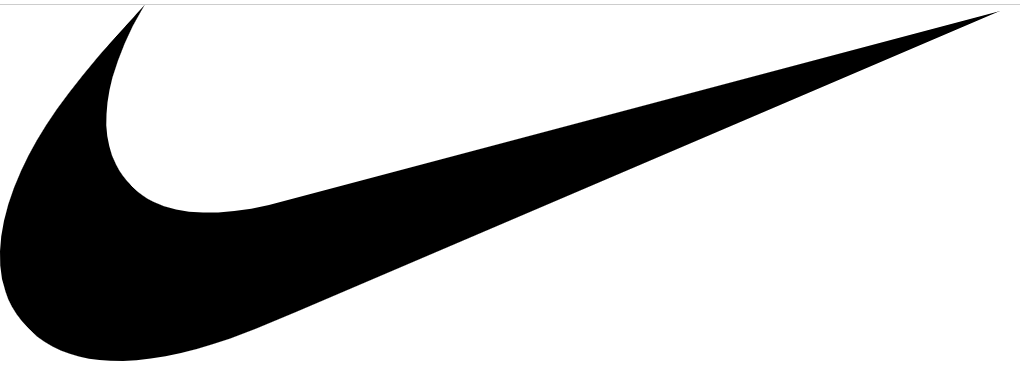

----------------------------------------------
 <test image>



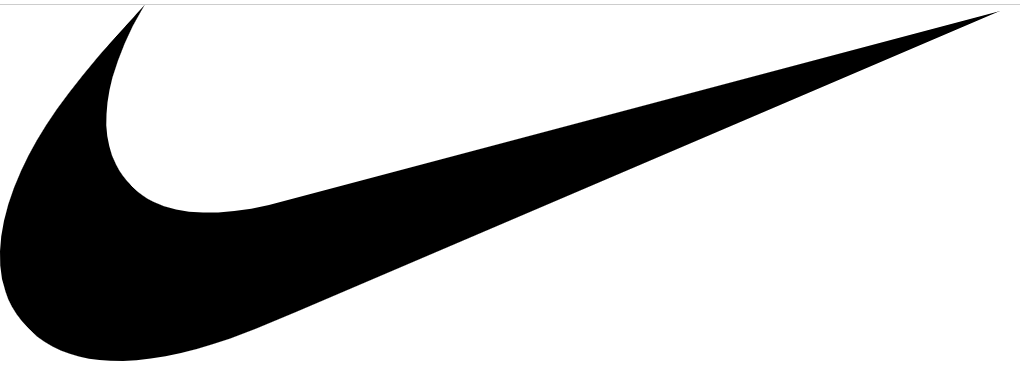

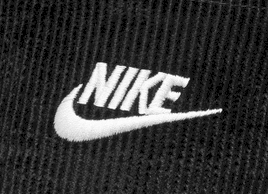

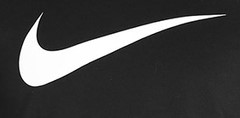

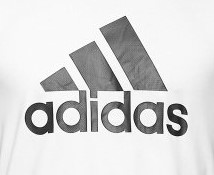

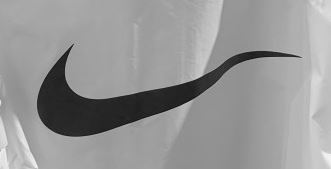

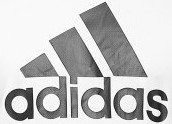

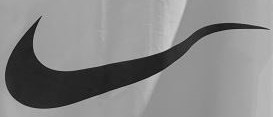

In [46]:
print(' <Logo''s inputimage>')
print()
#흑백으로 찾기

imgs = []
scr = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
imgs.append(scr)
cv2_imshow(scr)
print('----------------------------------------------')
print(' <test image>')
print()
for test_path in test_paths:
    scr = cv2.imread(test_path,cv2.IMREAD_GRAYSCALE)
    imgs.append(scr)
    cv2_imshow(scr)

In [43]:
hists = []
#바운딩박스 250 by 250으로 가정하여 진행.
#img 의 픽셀 배열을 재설정하여 넣기.
for img in imgs:
    if img is not None:
      img = cv2.resize(img, dsize=(250,250))
      print(img)
      hist = np.reshape(img,(50,-1))
      print(hist)

      hists.append(hist)
print('-----------')
print()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [247 247 247 ... 247 247 247]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [247 247 247 ... 247 247 247]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[28 44 32 ... 21 21 28]
 [29 49 34 ... 22 26 32]
 [26 54 37 ... 20 25 36]
 ...
 [28 44 68 ... 24 37 55]
 [32 45 69 ... 31 42 55]
 [40 62 83 ... 39 52 53]]
[[28 44 32 ... 23 28 42]
 [43 56 39 ... 32 33 53]
 [46 43 17 ... 25 32 50]
 

In [44]:
for i in range(1,len(hists)):
    sim = cosine_similarity(hists[0], hists[i])
    print('logo- '+str(i)+' th image'' sim is ')
    #print(sim)
    cnt,sum = 0,0
    length = len(sim) * len(sim[0])
    for k in sim:
        for j in k:
          #일정 유사도를 안보이는 픽셀수 세기.
          #그 수가 많으면 유사율이 높아도 인정안하게 하기 위함.
            if j < 0.75:
                cnt+=1
            sum += j
    #print(length)
    print('different dot num is : ' + str(cnt))
    print(sum/length)
            
    print()

logo- 1 th image sim is 
different dot num is : 788
0.8058294805958451

logo- 2 th image sim is 
different dot num is : 1475
0.7145400436844316

logo- 3 th image sim is 
different dot num is : 1553
0.6881124836172244

logo- 4 th image sim is 
different dot num is : 543
0.8359444021300444

logo- 5 th image sim is 
different dot num is : 387
0.8448823731442467

logo- 6 th image sim is 
different dot num is : 689
0.8186663894040985

logo- 7 th image sim is 
different dot num is : 390
0.8483166419830132

